First 5 records:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistical Summary:

Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                   

/tmp/ipython-input-2743475436.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


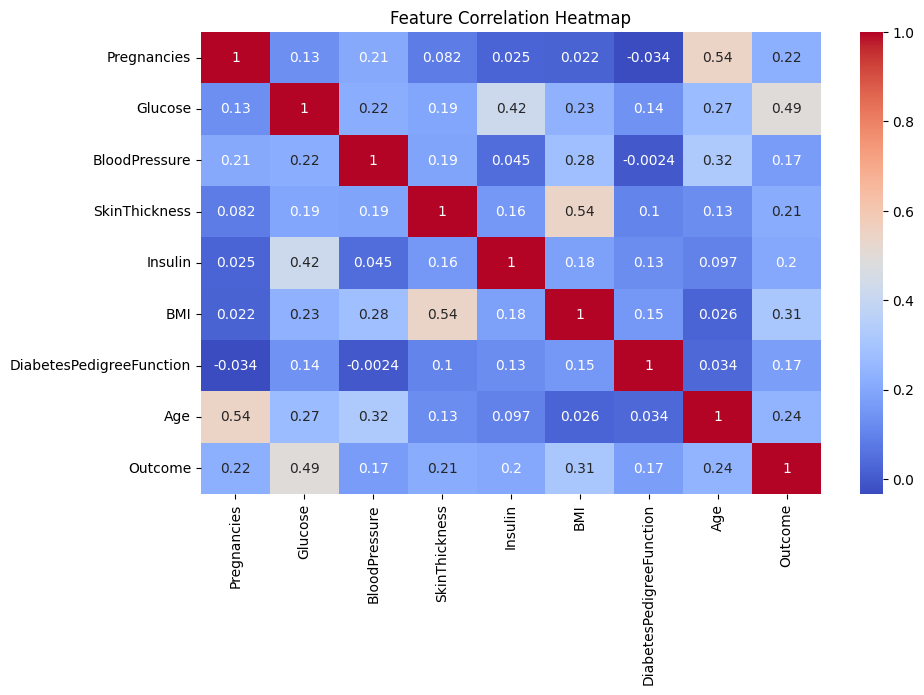


 Logistic Regression Results
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454

Confusion Matrix:
 [[82 18]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


 Decision Tree Results
Accuracy: 0.6883116883116883
Precision: 0.5681818181818182
Recall: 0.46296296296296297
F1 Score: 0.5102040816326531

Confusion Matrix:
 [[81 19]
 [29 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       100
           1       0.57      0.46      0.51        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg      

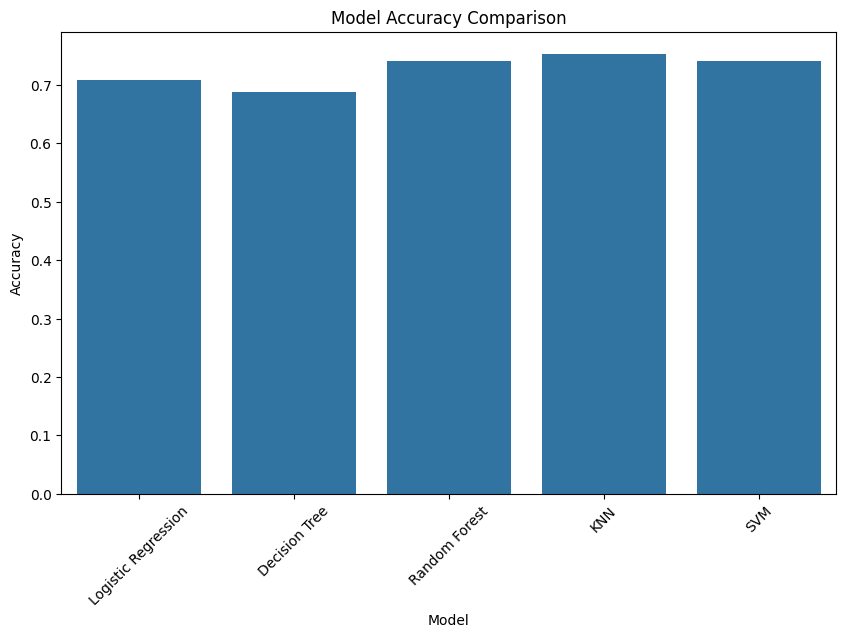


Best Performing Model:
 Model             KNN
Accuracy     0.753247
Precision        0.66
Recall       0.611111
F1 Score     0.634615
Name: 3, dtype: object


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Sample Patient Prediction:
✅ Patient is likely healthy


In [ ]:
# Disease Diagnosis using Machine Learning Algorithms

# Install required libraries (run only once)
!pip install pandas numpy matplotlib seaborn scikit-learn

# -----------------------------
# 1. Import Required Libraries
# -----------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# 2. Load Dataset
# -----------------------------

# Load dataset directly from GitHub (PIMA Diabetes Dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
           'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

data = pd.read_csv(url, names=columns)

print("First 5 records:")
data.head()

# -----------------------------
# 3. Dataset Understanding
# -----------------------------

print("\nDataset Information:")
data.info()

print("\nStatistical Summary:")
data.describe()

# -----------------------------
# 4. Data Preprocessing
# -----------------------------

# Replace zero values with NaN for medical features
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Fill missing values using median
for col in cols_with_zero:
    data[col].fillna(data[col].median(), inplace=True)

print("\nMissing values after cleaning:\n", data.isnull().sum())

# -----------------------------
# 5. Data Visualization
# -----------------------------

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# -----------------------------
# 6. Feature Selection
# -----------------------------

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# -----------------------------
# 7. Train Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 8. Feature Scaling
# -----------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 9. Machine Learning Models
# -----------------------------

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# -----------------------------
# 10. Model Training & Evaluation
# -----------------------------

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([model_name, acc, prec, rec, f1])

    print("\n",model_name,"Results")
    print("Accuracy:",acc)
    print("Precision:",prec)
    print("Recall:",rec)
    print("F1 Score:",f1)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("\nClassification Report:\n",classification_report(y_test,y_pred))

# -----------------------------
# 11. Model Comparison Table
# -----------------------------

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1 Score"])
results_df.sort_values(by="Accuracy", ascending=False)

# -----------------------------
# 12. Visualization of Model Comparison
# -----------------------------

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 13. Final Model Selection
# -----------------------------

best_model = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]
print("\nBest Performing Model:\n", best_model)

# -----------------------------
# 14. Sample Prediction (Real-life Scenario)
# -----------------------------

sample_patient = np.array([[2, 130, 70, 25, 120, 28.5, 0.45, 35]])
sample_scaled = scaler.transform(sample_patient)

final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

prediction = final_model.predict(sample_scaled)

print("\nSample Patient Prediction:")
if prediction[0] == 1:
    print("⚠️ High risk of diabetes detected")
else:
    print("✅ Patient is likely healthy")
